In [1]:
# Replicate the web example
# https://rdrr.io/cran/nricens/man/nricens-package.html

In [28]:
library(data.table)
library(nricens)
library(tidyverse)
suppressMessages(library(pROC))


UP and DOWN calculation:
  #of total, case, and control subjects at t0:  232 88 144
  #of subjects with 'p.new - p.std > cut' for all, case, control: 34 17 17
  #of subjects with 'p.std - p.new < cut' for all, case, control: 36 13 23

NRI estimation:
Point estimates:


                Estimate
NRI           0.08712121
NRI+          0.04545455
NRI-          0.04166667
Pr(Up|Case)   0.19318182
Pr(Down|Case) 0.14772727
Pr(Down|Ctrl) 0.15972222
Pr(Up|Ctrl)   0.11805556


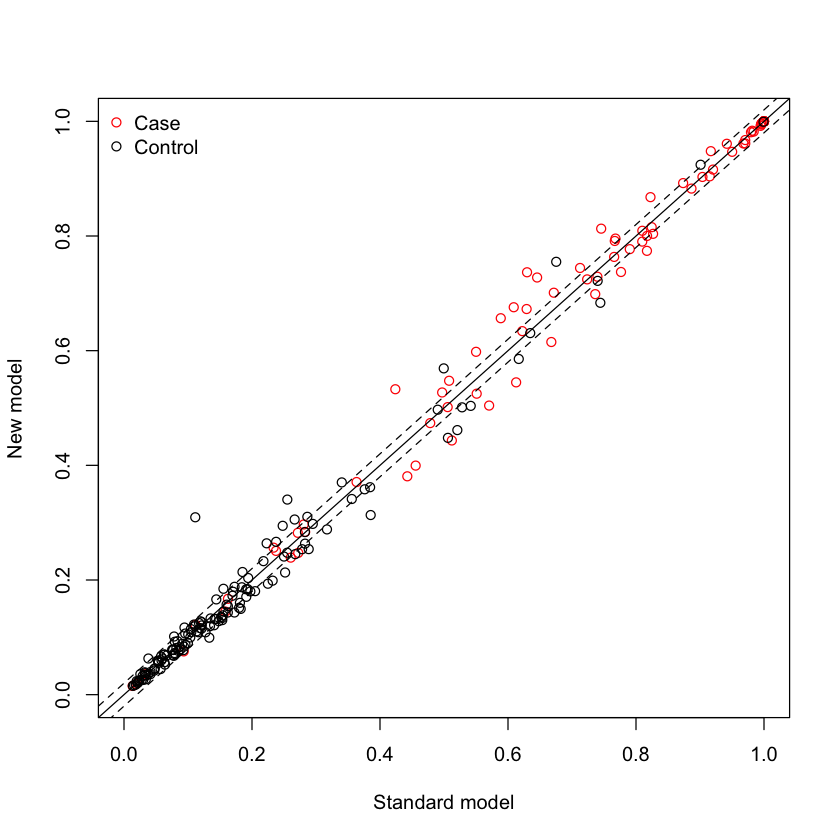

In [3]:
## Next, consider binary prediction models
library(survival)
dat = pbc[1:312,]
dat$sex = ifelse(dat$sex=='f', 1, 0)

## subjects censored before 2000 days are excluded
dat = dat[ dat$time > 2000 | (dat$time < 2000 & dat$status == 2), ]

## predciting the event of 'death' before 2000 days
event = ifelse(dat$time < 2000 & dat$status == 2, 1, 0)

## standard prediction model: age, bilirubin, and albumin
z.std = as.matrix(subset(dat, select = c(age, bili, albumin)))

## new prediction model: age, bilirubin, albumin, and protime
z.new = as.matrix(subset(dat, select = c(age, bili, albumin, protime)))

## glm fit (logistic model)
mstd = glm(event ~ ., binomial(logit), data.frame(event, z.std), x=TRUE)
mnew = glm(event ~ ., binomial(logit), data.frame(event, z.new), x=TRUE)

In [5]:
?nribin


UP and DOWN calculation:
  #of total, case, and control subjects at t0:  232 88 144
  #of subjects with 'p.new - p.std > cut' for all, case, control: 34 17 17
  #of subjects with 'p.std - p.new < cut' for all, case, control: 36 13 23

NRI estimation:
Point estimates:


                Estimate
NRI           0.08712121
NRI+          0.04545455
NRI-          0.04166667
Pr(Up|Case)   0.19318182
Pr(Down|Case) 0.14772727
Pr(Down|Ctrl) 0.15972222
Pr(Up|Ctrl)   0.11805556



Now in bootstrap..

Point & Interval estimates:


                Estimate  Std.Error       Lower     Upper
NRI           0.08712121 0.07705223 -0.07128336 0.2513497
NRI+          0.04545455 0.06069779 -0.06746753 0.1645070
NRI-          0.04166667 0.04288504 -0.03912037 0.1339404
Pr(Up|Case)   0.19318182 0.04036976  0.11250000 0.2763190
Pr(Down|Case) 0.14772727 0.03775590  0.07547042 0.2334365
Pr(Down|Ctrl) 0.15972222 0.02940257  0.10410217 0.2186251
Pr(Up|Ctrl)   0.11805556 0.02589063  0.06515280 0.1685283


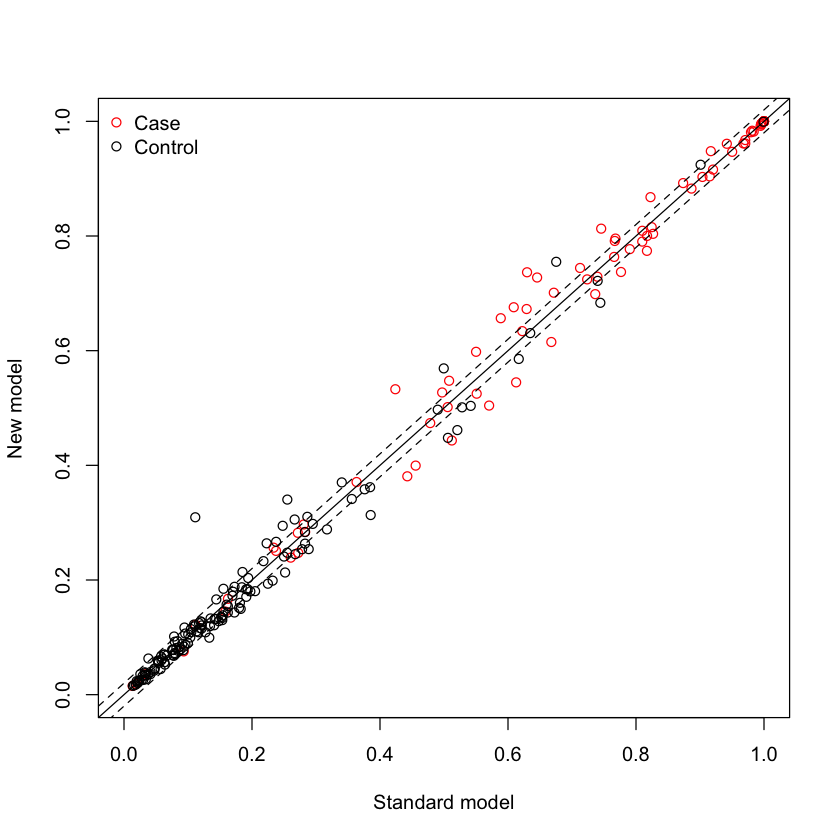

In [9]:
# In the first set of the argument, (mdl.std, mdl.new), 
# fitted results are used for the NRI calculation.

## predicted risk
p.std = mstd$fitted.values
p.new = mnew$fitted.values

## Calculation of risk difference NRI
# nribin(mdl.std = mstd, mdl.new = mnew, cut = 0.02, niter = 0,
#        updown = 'diff')

## Calculation of risk difference NRI using ('event', 'p.std', 'p.std').
res = nribin(event = event, p.std = p.std, p.new = p.new, cut = 0.02,
       niter = 200, updown = 'diff')


UP and DOWN calculation:
  #of total, case, and control subjects at t0:  232 88 144
  #of subjects with 'p.new - p.std > cut' for all, case, control: 34 17 17
  #of subjects with 'p.std - p.new < cut' for all, case, control: 36 13 23

NRI estimation:
Point estimates:


                Estimate
NRI           0.08712121
NRI+          0.04545455
NRI-          0.04166667
Pr(Up|Case)   0.19318182
Pr(Down|Case) 0.14772727
Pr(Down|Ctrl) 0.15972222
Pr(Up|Ctrl)   0.11805556



Now in bootstrap..
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Point & Interval estimates:


                Estimate  Std.Error       Lower     Upper
NRI           0.08712121 0.10708604 -0.03395005 0.3621544
NRI+          0.04545455 0.05091533 -0.02981786 0.1497712
NRI-          0.04166667 0.07495374 -0.02307692 0.2578679
Pr(Up|Case)   0.19318182 0.10643280  0.00000000 0.3618182
Pr(Down|Case) 0.14772727 0.08282242  0.00000000 0.2842713
Pr(Down|Ctrl) 0.15972222 0.12751950  0.00000000 0.4309524
Pr(Up|Ctrl)   0.11805556 0.06633437  0.00000000 0.2379896


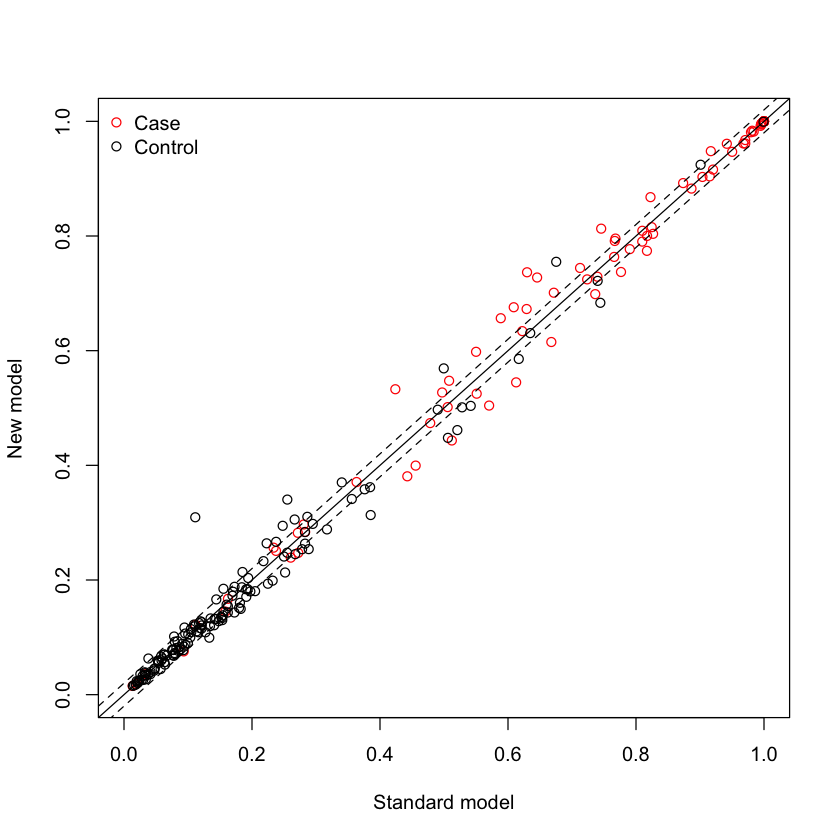

In [21]:
res = nribin(mdl.std = mstd, mdl.new = mnew, cut = 0.02, niter = 200,
       updown = 'diff')

In [13]:
boot.nri= res$bootstrapsample[,'NRI']

In [17]:
z = mean(boot.nri)/sd(boot.nri)

In [15]:
?sd

In [38]:
rownames_to_column(res$nri)

rowname,Estimate,Std.Error,Lower,Upper
NRI,0.08712121,0.10708604,-0.03395005,0.3621544
NRI+,0.04545455,0.05091533,-0.02981786,0.1497712
NRI-,0.04166667,0.07495374,-0.02307692,0.2578679
Pr(Up|Case),0.19318182,0.10643280,0.00000000,0.3618182
Pr(Down|Case),0.14772727,0.08282242,0.00000000,0.2842713
Pr(Down|Ctrl),0.15972222,0.12751950,0.00000000,0.4309524
Pr(Up|Ctrl),0.11805556,0.06633437,0.00000000,0.2379896


In [33]:
# Compare the ROC of two model
pheno='event'
dd = data.frame(event, z.new)
p.std = predict(mstd,type=c("response"))
p.new = predict(mnew,type=c("response"))

rocs = roc(dd[[pheno]], p.std)
rocn = roc(dd[[pheno]], p.new)
roc_res = roc.test(rocs, rocn, method='delong')

In [34]:
roc_res$estimate

AUC of roc1 AUC of roc2 
  0.9109848   0.9115372

In [35]:
roc_res$p.value

[1] 0.8182092

In [36]:
roc_res$method

[1] "DeLong's test for two correlated ROC curves"

In [39]:
?write.table